# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [3]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [4]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [5]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

1. Because the data was assigned randomly, the randomization condition for the CLT is fulfilled, and this also lets us assume that eahc onservation is independent from one another. The number of observations exceeds 30, and the sample size is not large enough to encompass more than 10% of the population. With all of the CLT conditions fulfilled, we can assume the data follows a normal distribution, meaning it would be appropriate for us to use a one-tailed two sample z-test for the difference in means.

2.

H0: The difference in the mean of the number of callbacks for white-sounding and black sounding names is less than or equal to zero.

HA: The difference in the mean of the number of callbacks for white-sounding and black sounding names is greater than zero.


In [9]:
w = data[data.race=='w']
b = data[data.race=='b']
w_calls = w.call
b_calls = b.call

2435

The margin of error from the bootstrapped differences in mean callbacks between white and black applicants is 0.00781563117605
The bootstrap 95% confidence interval for the difference in mean callbacks between white and black applicants has a lower limit of 0.0168377831578  and and upper limit of 0.047227922827
The p-value from our bootstrapped hypothesis test is 0.0

The margin of error from the normally distributed differences in mean callbacks between white and black applicants is 0.0128025056854
The normally approximated 95% confidence interval for the difference in mean callbacks between white and black applicants has a lower limit of 0.0192303491697  and and upper limit of 0.0448353605404
The p-value from our z-test is 0.00617335364969


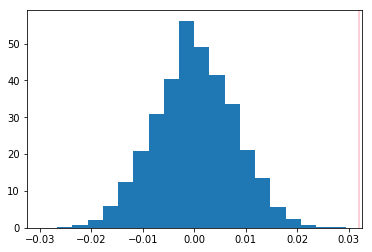

In [8]:
# Q3
np.random.seed(7209)

mean_w = np.mean(w_calls)
mean_b = np.mean(b_calls)
mean_calls = np.mean(data.call)
mean_diff = mean_w - mean_b
std_w = np.std(w_calls)
std_b = np.std(b_calls)
n_w = len(w_calls)
n_b = len(b_calls)

# Bootstrap margin of error, 95% confidence interval, and p-value
ci_bs_reps = np.empty(10000)
for i in range(10000):
    bs_sample_w = np.random.choice(w_calls, len(w_calls))
    bs_sample_b = np.random.choice(b_calls, len(b_calls))
    ci_bs_reps[i] = np.mean(bs_sample_w) - np.mean(bs_sample_b)
margin_error_bs = np.std(ci_bs_reps)
print('The margin of error from the bootstrapped differences in mean callbacks between white and black applicants is',
     margin_error_bs)
conf_int_bs = np.percentile(ci_bs_reps, [2.5, 97.5])
print('The bootstrap 95% confidence interval for the difference in mean callbacks between white and black applicants has a lower limit of', 
      conf_int_bs[0], ' and and upper limit of', conf_int_bs[1])
w_calls_shifted = w_calls - mean_w + mean_calls
b_calls_shifted = b_calls - mean_b + mean_calls
w_bs_reps = np.empty(10000)
b_bs_reps = np.empty(10000)
for i in range(10000):
    w_bs_sample = np.random.choice(w_calls_shifted, len(w_calls_shifted))
    w_bs_reps[i] = np.mean(w_bs_sample)
    b_bs_sample = np.random.choice(b_calls_shifted, len(b_calls_shifted))
    b_bs_reps[i] = np.mean(b_bs_sample)
test_bs_reps = w_bs_reps - b_bs_reps
_ = plt.hist(test_bs_reps, bins=20, normed=True)
_ = plt.axvline(mean_diff, color='pink')
p_bs = np.sum(test_bs_reps >= mean_diff)/ len(test_bs_reps)
print('The p-value from our bootstrapped hypothesis test is', p_bs)

print('')

# Normal distribution margin of error, 95% confidence interval, and p-value
std_error_all = np.sqrt(std_w**2/n_w + std_b**2/n_b)
margin_error_freq = st.norm.ppf(0.95) * std_error_all
print('The margin of error from the normally distributed differences in mean callbacks between white and black applicants is',
     margin_error_freq)
conf_int_freq = (mean_diff - margin_error_freq, mean_diff + margin_error_freq)
print('The normally approximated 95% confidence interval for the difference in mean callbacks between white and black applicants has a lower limit of',
      conf_int_freq[0], ' and and upper limit of', conf_int_freq[1])
z = (mean_diff - 0) / margin_error_freq
p_freq = 1 - st.norm.cdf(z)
print('The p-value from our z-test is', p_freq)

<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

4. Based on the results of both the bootstrap hypothesis test and the z-test, the mean difference in callbacks between white and black applicants from the data can be considered statistcally significant even at 99% significance, given that the difference is zero or less callbacks. We can reject the null hypothesis that the difference is zero or less callbacks, and the data suggests there may be a greater number of callbacks for applicants with white-sounding names, as opposed to applicants with black-sounding names.

5. The dataset includes a multitude of other factors that may also heavily contribute to whether an applicant receives a callback, such as years of experience or education level. Our tests only concerned the racial sound of the name of the applicant, which had a statistically significant effect on the rate of callback, but our tests do not prove that it is the most important factor. We could amend our analysis by also doing a difference in means test for another factor, such as work experience, between the black and white applicants to see if there a significant difference between the groups that may also be affecting callback rate. 